**Question 1: What is hypothesis testing in statistics?**

    Hypothesis testing is a formal statistical framework for deciding whether the evidence in sample data supports a specific claim (the alternative hypothesis) about a population parameter, or whether the claim should be rejected in favor of the null hypothesis. The procedure involves: (1) stating null (H₀) and alternative (H₁) hypotheses, (2) choosing a significance level α, (3) computing a test statistic from the sample, (4) comparing the test statistic to a sampling distribution (or using a p-value), and (5) making a decision (reject or fail to reject H₀) with stated confidence and interpretation.

**Question 2: What is the null hypothesis, and how does it differ from the alternative hypothesis?**

    The null hypothesis (H₀) is a statement of no effect, no difference, or a specific baseline value for a population parameter (e.g., μ = μ₀). The alternative hypothesis (H₁) expresses the claim we want to test (e.g., μ ≠ μ₀, μ > μ₀, or μ < μ₀). H₀ is assumed true until evidence from the sample favors H₁; rejection of H₀ indicates statistical evidence supporting H₁.

**Question 3: Explain the significance level in hypothesis testing and its role in deciding the outcome of a test.**

    The significance level α is the probability threshold for making a Type I error (rejecting H₀ when it is actually true). Common values are 0.05 or 0.01. If the p-value ≤ α, we reject H₀ (evidence against H₀ is strong). If p-value > α, we fail to reject H₀. α determines how strict we are — smaller α reduces Type I errors but increases Type II error probability (β).

**Question 4: What are Type I and Type II errors? Give examples of each.**

    Type I error (false positive): rejecting H₀ when it is true. Example: Concluding a new drug works when it actually does not (claiming effect where none exists).

    Type II error (false negative): failing to reject H₀ when H₁ is true. Example: Concluding a drug has no effect when it actually does (missing a real effect). Probabilities: Type I error = α, Type II error = β. Power = 1 − β.

**Question 5: Difference between a Z-test and a T-test. When to use each.**

    A Z-test uses the standard normal distribution (Z) as the sampling distribution for the test statistic; it's appropriate when the population standard deviation σ is known (rare in practice) or when sample sizes are large and CLT applies. A T-test uses Student’s t distribution and is used when σ is unknown and estimated by the sample standard deviation s, particularly for small samples (n < ~30). As n grows, the t distribution approaches the normal.

**Question 6: Write a Python program to generate a binomial distribution with n=10 and p=0.5, then plot its histogram.**

Counts by number of successes (0..10): {0: 11, 1: 99, 2: 432, 3: 1159, 4: 2083, 5: 2501, 6: 2029, 7: 1171, 8: 413, 9: 98, 10: 4}


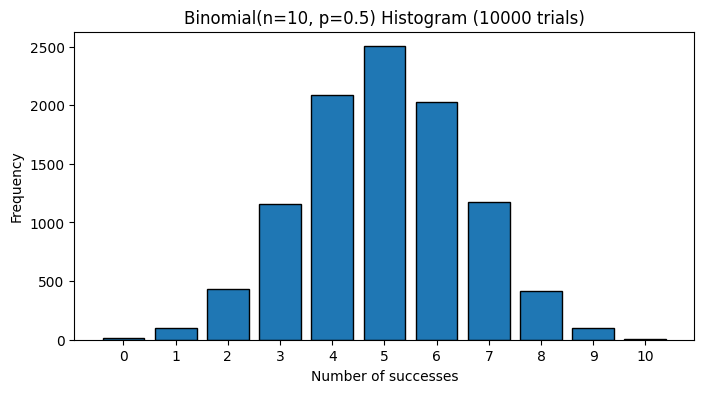

In [1]:
# Q6: Binomial distribution histogram
import numpy as np
import matplotlib.pyplot as plt

np.random.seed(1)   # reproducible
n = 10
p = 0.5
trials = 10000  # simulate many experiments
samples = np.random.binomial(n=n, p=p, size=trials)

# Quick summary
unique, counts = np.unique(samples, return_counts=True)
summary = dict(zip(unique.tolist(), counts.tolist()))
print("Counts by number of successes (0..10):", summary)

# Plot histogram
plt.figure(figsize=(8,4))
plt.hist(samples, bins=range(0, n+2), align='left', rwidth=0.8, edgecolor='black')
plt.title("Binomial(n=10, p=0.5) Histogram (10000 trials)")
plt.xlabel("Number of successes")
plt.ylabel("Frequency")
plt.xticks(range(0, n+1))
plt.show()


**Question 7: Implement hypothesis testing using Z-statistics for a sample dataset in Python. Show code and interpret results.**

**Given data:**

**sample_data = [49.1, 50.2, 51.0, 48.7, 50.5, 49.8, 50.3, 50.7, 50.2, 49.6,
               50.1, 49.9, 50.8, 50.4, 48.9, 50.6, 50.0, 49.7, 50.2, 49.5,
               50.1, 50.3, 50.4, 50.5, 50.0, 50.7, 49.3, 49.8, 50.2, 50.9,
               50.3, 50.4, 50.0, 49.7, 50.5, 49.9]**


In [2]:
# Q7: One-sample Z-test (two-sided) assuming known population sigma
import numpy as np
from scipy import stats
import math

sample_data = [49.1,50.2,51.0,48.7,50.5,49.8,50.3,50.7,50.2,49.6,
               50.1,49.9,50.8,50.4,48.9,50.6,50.0,49.7,50.2,49.5,
               50.1,50.3,50.4,50.5,50.0,50.7,49.3,49.8,50.2,50.9,
               50.3,50.4,50.0,49.7,50.5,49.9]
arr = np.array(sample_data)
n = arr.size
sample_mean = arr.mean()

# --- Assumption for Z-test:
mu0 = 50.0            # null hypothesis: population mean is 50
sigma_known = 1.0     # assumed known population standard deviation

# Z statistic and p-value (two-sided)
z_stat = (sample_mean - mu0) / (sigma_known / math.sqrt(n))
p_value_two_sided = 2 * (1 - stats.norm.cdf(abs(z_stat)))

print("n =", n)
print("Sample mean =", sample_mean)
print("Z statistic =", z_stat)
print("Two-sided p-value =", p_value_two_sided)

# Decision at alpha = 0.05
alpha = 0.05
if p_value_two_sided < alpha:
    print("Reject H0 at alpha=0.05")
else:
    print("Fail to reject H0 at alpha=0.05")

# t-test (more common when sigma unknown)
t_stat, p_val = stats.ttest_1samp(arr, popmean=50.0)
print("t-statistic:", t_stat, "p-value:", p_val)

n = 36
Sample mean = 50.08888888888889
Z statistic = 0.5333333333333314
Two-sided p-value = 0.5938028572077036
Fail to reject H0 at alpha=0.05
t-statistic: 0.9940271559503017 p-value: 0.3270325549821643



**Question 8: Write a Python script to simulate data from a normal distribution and calculate the 95% confidence interval for its mean. Plot the data using Matplotlib.**

n = 100
Sample mean = 98.44388299176106
Sample sd = 15.633903081010848
95% CI for mean = (95.3418, 101.5460)


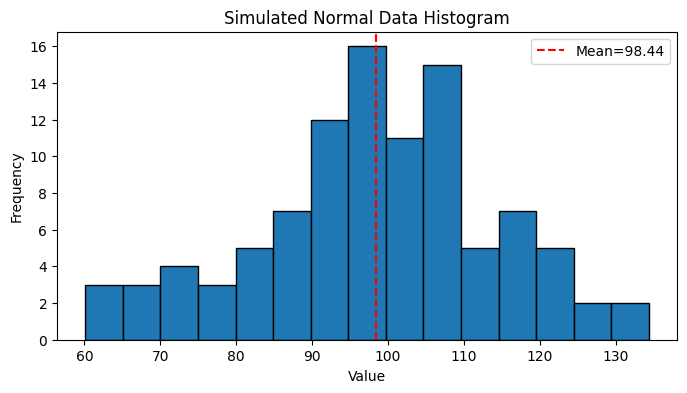

In [3]:
# Q8: Simulate normal data, compute 95% CI for mean, and plot
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats
import math

np.random.seed(2)   # reproducible
n = 100
mu = 100
sigma = 15          # true sigma (if known); we'll compute CI using t (sigma unknown in practice)
data = np.random.normal(loc=mu, scale=sigma, size=n)

# sample statistics
sample_mean = data.mean()
sample_sd = data.std(ddof=1)
se = sample_sd / math.sqrt(n)

# 95% CI using t-distribution
alpha = 0.05
t_crit = stats.t.ppf(1 - alpha/2, df=n-1)
ci_lower = sample_mean - t_crit * se
ci_upper = sample_mean + t_crit * se

print("n =", n)
print("Sample mean =", sample_mean)
print("Sample sd =", sample_sd)
print("95% CI for mean = ({:.4f}, {:.4f})".format(ci_lower, ci_upper))

# Plot histogram
plt.figure(figsize=(8,4))
plt.hist(data, bins=15, edgecolor='black')
plt.axvline(sample_mean, color='red', linestyle='--', label=f"Mean={sample_mean:.2f}")
plt.title("Simulated Normal Data Histogram")
plt.xlabel("Value")
plt.ylabel("Frequency")
plt.legend()
plt.show()


**Question 9: Write a Python function to calculate the Z-scores from a dataset and visualize the standardized data using a histogram. Explain what the Z-scores represent.**


Mean = 50.08888888888889 Sample sd = 0.5365379910807955
First 10 Z-scores: [-1.84309202  0.20708899  1.69812972 -2.58861239  0.76622927 -0.53843138
  0.39346908  1.13898945  0.20708899 -0.91119156]


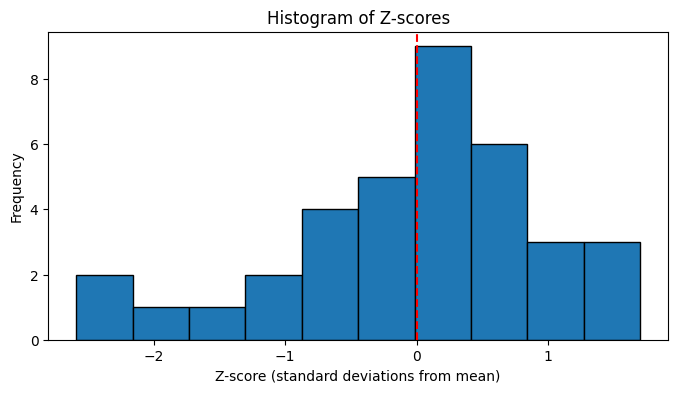

In [4]:
# Q9: Compute Z-scores and histogram
import numpy as np
import matplotlib.pyplot as plt

def z_scores(data):
    arr = np.array(data, dtype=float)
    mu = arr.mean()
    sd = arr.std(ddof=1)   # sample standard deviation
    zs = (arr - mu) / sd
    return zs, mu, sd

# Example: reuse sample_data from Q7 (or any dataset)
sample_data = [49.1,50.2,51.0,48.7,50.5,49.8,50.3,50.7,50.2,49.6,
               50.1,49.9,50.8,50.4,48.9,50.6,50.0,49.7,50.2,49.5,
               50.1,50.3,50.4,50.5,50.0,50.7,49.3,49.8,50.2,50.9,
               50.3,50.4,50.0,49.7,50.5,49.9]

zs, mu, sd = z_scores(sample_data)
print("Mean =", mu, "Sample sd =", sd)
print("First 10 Z-scores:", zs[:10])

# Plot histogram of Z-scores
plt.figure(figsize=(8,4))
plt.hist(zs, bins=10, edgecolor='black')
plt.title("Histogram of Z-scores")
plt.xlabel("Z-score (standard deviations from mean)")
plt.ylabel("Frequency")
plt.axvline(0, color='red', linestyle='--')
plt.show()